In [162]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import pandas as pd

In [163]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
        ])
    )

---
**The dataset is balanced, we can see this in following cells**

In [164]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [165]:
len(train_set)

60000

In [166]:
train_set.targets # new version of train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [167]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

---

In [168]:
image, label = next(iter(train_set))


In [169]:
image.shape

torch.Size([1, 28, 28])

label: 9


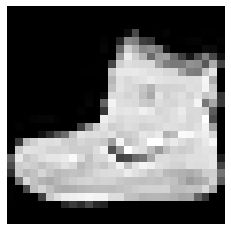

In [170]:

plt.axis('off')
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [171]:
train_loader=torch.utils.data.DataLoader(train_set, batch_size=10)

In [172]:
batch = next(iter(train_loader))
images, labels = batch

In [173]:
images.shape

torch.Size([10, 1, 28, 28])

In [174]:
labels.shape

torch.Size([10])

labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


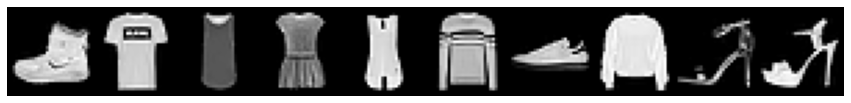

In [175]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels: ', labels)


## How to build Neural Network in Python
Build a neural network in PyTorch
1. Extend the *nn.Module* base class.
2. Define layers as class attributes.
3. Implement the *forward()* method. 

In [176]:
class Network:
    def __init__(self):
        self.layer = None
    
    def forward(self, t):
        t = self.layer(t)
        return t

In [177]:
import torch.nn as nn

In [178]:
class Network(nn.Module): # line 1
    def __init__(self):
        super(Network, self).__init__() # line 3
        # Input layer correspond to f(x) = x so it's implicit 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # out_channels --> features_map
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # out_channels --> features_map

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # Fully Connected
        self.fc2 = nn.Linear(in_features=120, out_features=60) # Fully Connected

        self.out = nn.Linear(in_features=60, out_features=10)

    # In this function we need to define how layare communicates eachother
    def forward(self, t):
        # (1) Input layer
        t = t 
       
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear Layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear Layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        return t


In [179]:
nt = Network()
nt

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

**We can access at all weight of the network with this command**

In [180]:
nt.conv1.weight # Only weight of frist convolutional layer

Parameter containing:
tensor([[[[-6.6487e-02, -1.2520e-01, -1.3090e-01,  5.7080e-02,  6.3992e-02],
          [-1.6310e-01,  1.5710e-01,  8.5196e-02,  1.4902e-01,  8.6579e-02],
          [-5.1363e-02, -8.7064e-02, -1.9022e-01,  1.1060e-01, -2.3465e-02],
          [-4.7620e-02, -1.0313e-01, -1.5768e-01, -1.3829e-01, -1.7069e-01],
          [ 1.6657e-01,  1.8082e-01, -9.2087e-03,  1.8181e-01, -1.8325e-01]]],


        [[[-1.4560e-01,  1.1587e-01,  1.4237e-01, -1.5051e-02, -1.7673e-01],
          [ 1.3198e-01,  1.8545e-01,  2.6446e-02,  1.5152e-04,  2.4853e-02],
          [-5.8121e-02, -1.9715e-01, -1.4446e-01,  1.9191e-02,  1.6903e-01],
          [-2.3228e-02,  1.3333e-01,  1.6948e-01, -1.2930e-01,  1.2222e-01],
          [ 6.2178e-02,  1.6330e-01, -1.4243e-01, -6.4304e-02, -9.5943e-02]]],


        [[[ 1.4679e-01, -1.1508e-01, -1.5975e-01,  5.4409e-03, -8.7104e-02],
          [-5.5827e-02,  7.0327e-02, -1.5870e-01,  2.2033e-03, -7.1128e-02],
          [ 5.0664e-02, -9.5322e-02,  4.5818e-

The shape of the tensor is showing below. 
- The first axis of the tensor is *out_channels* ( or ***features map*** ); 
- The second axis of the tensor is *in_channels* ( or ***number of input in a layer***);
- The third and the fourth axis of the tensor is **width** and **height** of image.

In [181]:
print(f'Shape of the weight Tensor: ', nt.conv1.weight.shape)

Shape of the weight Tensor:  torch.Size([6, 1, 5, 5])


# Neural Network Implementation

In [182]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)

In [183]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
        ])
    )

##sdmsakdmaskdlskajdsakjdksajdsajkdjskdjlsajdaksj

In [184]:
class Network(nn.Module): # line 1
    def __init__(self):
        super(Network, self).__init__() # line 3
        # Input layer correspond to f(x) = x so it's implicit 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # out_channels --> features_map
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # out_channels --> features_map

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # Fully Connected
        self.fc2 = nn.Linear(in_features=120, out_features=60) # Fully Connected

        self.out = nn.Linear(in_features=60, out_features=10)

    # In this function we need to define how layare communicates eachother
    def forward(self, t):
        # (1) Input layer ( can be omit)
        t = t 
       
        # (2) hidden conv layer
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear Layer
        t = self.fc1(t.reshape(-1, 12 * 4 * 4))
        t = F.relu(t)
        
        # (5) hidden linear Layer
        t = F.relu(self.fc2(t))
        
        # (6) output layer
        t = self.out(t)
      
        #t = F.softmax(t, dim=1)
        return t

In [185]:
torch.set_grad_enabled(False)

In [186]:
network = Network()

In [187]:
sample = next(iter(train_set))

In [188]:
image, label = sample
image.shape
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [189]:
pred = network(image)
pred.shape

torch.Size([1, 10])

In [190]:
print(f'prediction: {pred}')
print(f'label: {label}')
print(rf'index: {pred.argmax(1)[0]}')

prediction: tensor([[ 0.0457, -0.0786, -0.0685, -0.1149,  0.0453,  0.0303, -0.0979, -0.1055, -0.1200,  0.0120]])
label: 9
index: 0


In [191]:
# Softmax function remap value of the array between [0,1]
F.softmax(pred, dim=1)

tensor([[0.1093, 0.0965, 0.0975, 0.0931, 0.1092, 0.1076, 0.0947, 0.0939, 0.0926, 0.1057]])

# Batch Processing 
Pass image batch to PyTorch CNN

In [192]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from torchinfo import summary

torch.set_printoptions(linewidth=120)

In [193]:
print('torch:', torch.__version__)
print('torchvision:', torchvision.__version__)

torch: 1.11.0
torchvision: 0.12.0


In [194]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
        ])
    )

In [195]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) 

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60) 

        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):       
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
  
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
  
        t = F.relu(self.fc1(t.reshape(-1, 12 * 4 * 4)))
    
        t = F.relu(self.fc2(t))
        
        t = self.out(t)
        
        return t

In [196]:
torch.set_grad_enabled(False);

In [197]:
network = Network()

In [198]:
batch_size = 10
data_loader = torch.utils.data.DataLoader(
  train_set,
  batch_size=batch_size
)

In [199]:
batch = next(iter(data_loader))
images, labels = batch

In [200]:
print(images.shape) # We have already the batch, so we don't need to unsqueeze
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [241]:
preds = network(images)
preds.shape # We have 10x10 tensor, because we have 10 prediction for 10 classes of clothes

torch.Size([100, 10])

In [202]:
print('labels:             \t',labels)
print('predictions:        \t',preds.argmax(dim=1),'\n')
print('shape of predictions:\t',preds.argmax(dim=1).shape)

labels:             	 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])
predictions:        	 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 

shape of predictions:	 torch.Size([10])


In [203]:
def get_num_correct(pred, labels):
  return preds.argmax(dim=1).eq(labels).type(torch.uint8)

In [204]:
get_num_correct(preds, labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)

In [205]:
summary(network, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Network                                  --                        --
├─Conv2d: 1-1                            [10, 6, 24, 24]           156
├─Conv2d: 1-2                            [10, 12, 8, 8]            1,812
├─Linear: 1-3                            [10, 120]                 23,160
├─Linear: 1-4                            [10, 60]                  7,260
├─Linear: 1-5                            [10, 10]                  610
Total params: 32,998
Trainable params: 32,998
Non-trainable params: 0
Total mult-adds (M): 2.37
Input size (MB): 0.03
Forward/backward pass size (MB): 0.35
Params size (MB): 0.13
Estimated Total Size (MB): 0.52

# The Training Process
1. Get batch from the training set
2. Pass batch to network
3. Calculate the loss (difference between the predicted values and the true values)
4. Calculate the gradient of the loss function with respect to the network's weights.
5. Update the weights using the gradients to reduce the loss
6. Repeat steps 1-5 until one epoch is compled
7. Repeat steps 1-6 for as many epochs required to obtain the desired level of accuracy

In [242]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torchinfo import summary

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True);

In [243]:
print('torch:', torch.__version__)
print('torchvision:', torchvision.__version__)

torch: 1.11.0
torchvision: 0.12.0


In [244]:
def get_num_correct(pred, labels):
  return preds.argmax(dim=1).eq(labels).sum()

In [245]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) 

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60) 

        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):       
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
  
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
  
        t = F.relu(self.fc1(t.reshape(-1, 12 * 4 * 4)))
    
        t = F.relu(self.fc2(t))
        
        t = self.out(t)
        
        return t

In [246]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
        ])
    )

In [247]:
cnn = Network()

In [248]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

## Calculating the Loss 

$$ \Large \frac{1}{1+ {e}^{-w \cdot x}} \quad $$

Where:
- *w* is the weights vector
- *x* is input vector

In [249]:
preds = cnn(images)
loss = F.cross_entropy(preds, labels) # Compute the loss function
loss.item()


2.310542345046997

## Calculating the Gradients

In [250]:
print(cnn.conv1.weight.grad)

None


In [251]:
loss.backward() # Calculating the gradients
cnn.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

## All in One Block

In [255]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels)

loss.backward()
optimizer.step()

# ----------------------------------------------

print('loss1:', loss.item())
preds = network(images)
loss - F.cross_entropy(preds, labels)
print('loss2:', loss.item())
get_num_correct(preds, labels)


loss1: 2.299384593963623
loss2: 2.299384593963623


tensor(15)